# Tarea 3 Mecánica Cuántica 1

### Parte c: Discretización para el dominio con N = 1000 puntos con  $$ -5 \leq x \leq 5$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
X = np.linspace(-5,5,1000)
print(X)

print(X[1]-X[0])

[-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.18918919 -4

Como podemos ver, el valor de nuestro h resulta siendo de 0.01, por lo que podemos decir que nuestro dominio se encuentra discretizado en 1000 puntos.

### Parte d: Defina una función que calcule el potencial para cada $x_i$ de la discretización.

Sabemos que para cada $x_i$ de la discretización, el potencial se calcula como: $$V_{terorica}(x_i) = \frac{1}{2}x_i^2$$  


In [3]:


def V(x):
    return 0.5*x**2

print(V(X))

[1.25000000e+01 1.24500001e+01 1.24001003e+01 1.23503008e+01
 1.23006014e+01 1.22510023e+01 1.22015033e+01 1.21521046e+01
 1.21028060e+01 1.20536077e+01 1.20045095e+01 1.19555116e+01
 1.19066138e+01 1.18578163e+01 1.18091189e+01 1.17605218e+01
 1.17120248e+01 1.16636281e+01 1.16153315e+01 1.15671352e+01
 1.15190391e+01 1.14710431e+01 1.14231474e+01 1.13753518e+01
 1.13276565e+01 1.12800613e+01 1.12325664e+01 1.11851717e+01
 1.11378771e+01 1.10906828e+01 1.10435886e+01 1.09965947e+01
 1.09497010e+01 1.09029074e+01 1.08562141e+01 1.08096209e+01
 1.07631280e+01 1.07167353e+01 1.06704427e+01 1.06242504e+01
 1.05781582e+01 1.05321663e+01 1.04862746e+01 1.04404830e+01
 1.03947917e+01 1.03492006e+01 1.03037096e+01 1.02583189e+01
 1.02130283e+01 1.01678380e+01 1.01227479e+01 1.00777579e+01
 1.00328682e+01 9.98807867e+00 9.94338934e+00 9.89880020e+00
 9.85431127e+00 9.80992254e+00 9.76563400e+00 9.72144567e+00
 9.67735754e+00 9.63336961e+00 9.58948187e+00 9.54569434e+00
 9.50200701e+00 9.458419

### Parte e: Defina una funcion (metodo de Numerov) que tenga como parametros la discretizacion y un valor de energıa especıfico

In [4]:
def Numerov(X, E):
    h = X[1]-X[0]
    Y = np.zeros(len(X))
    Y[0] = 0
    Y[1] = 1*10**(-5)	
    for i in range(2,len(X)):
        num1 = 2*(1+((5/12)*(h**2)*2*((V(X[i-1]))-(E))))*Y[i-1]
        num2 = (1-(1/12)*(h**2)*2*((V(X[i-2]))-(E)))*Y[i-2]
        denom = 1-(1/12)*(h**2)*2*((V(X[i]))-(E))
        Y[i] = (num1-num2)/denom
    #Normalizar
    #Y = Y/np.sqrt(np.sum(Y**2))
    return Y




### Parte F: Valores propios del operador
#### Se crea una función para evaluar si el valor propio de la energía satisface la condición de frontera

In [5]:
def CondicionValoresPropios(X, E):
    dE = 0.001
    Y = Numerov(X, E)
    Ycomp = Numerov(X, E+dE)
    if Y[-1]*Ycomp[-1] < 0:
        return E, Y[-1]
    else:
        return False
    

### Parte G: Valores propios del operador
#### Haciendo un barrido por un rango de energías, encontramos los valores propios para los niveles de energía. Como logramos apreciar, son los mismos valores del enunciado de la tarea.

In [6]:
E_i = 0.4
E = []
Vs = []

while len(E) < 6:
    condicion =  CondicionValoresPropios(X, E_i) 
    if condicion != False:
        E.append(E_i)
        Vs.append(condicion[1])
    E_i += 0.01
print(E)
print(Vs)

[0.5000000000000001, 1.5000000000000009, 2.4999999999999907, 3.4999999999999694, 4.4999999999999485, 5.499999999999927]
[9.983123432164893e-05, -0.00019718060951054979, 0.00022100458306456092, -0.0002353893665826133, 0.0002503491245172388, -0.0002682520194074181]


In [7]:
#Simplificado
for i in range(len(E)):
    E[i] = round(E[i], 2)
print(E)
print(Vs)

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
[9.983123432164893e-05, -0.00019718060951054979, 0.00022100458306456092, -0.0002353893665826133, 0.0002503491245172388, -0.0002682520194074181]


### Parte H: Dibujar estados Propios del operador

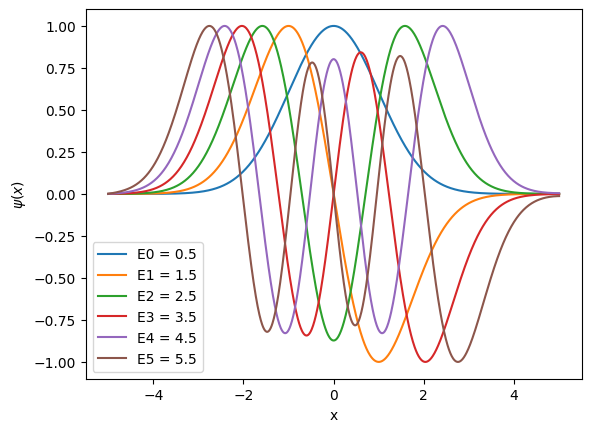

In [8]:

Y1 = Numerov(X, 0.5)
Y1 = Y1/max(Y1)
Y2 = Numerov(X, 1.5)
Y2 = Y2/max(Y2)
Y3 = Numerov(X, 2.5)
Y3 = Y3/max(Y3)
Y4 = Numerov(X, 3.5)
Y4 = Y4/max(Y4)
Y5 = Numerov(X, 4.5)
Y5 = Y5/max(Y5)
Y6 = Numerov(X, 5.5)
Y6 = Y6/max(Y6)

plt.plot(X,Y1, label = "E0 = 0.5")
plt.plot(X,Y2, label = "E1 = 1.5")
plt.plot(X,Y3, label = "E2 = 2.5")
plt.plot(X,Y4, label = "E3 = 3.5")
plt.plot(X,Y5, label = "E4 = 4.5")
plt.plot(X,Y6, label = "E5 = 5.5")
plt.ylabel("$\psi(x)$")
plt.xlabel("x")
plt.legend()
plt.show()


### Parte i: Potencial Gaussiano. Primeros cinco estados ligados y los estados propios del operador.

#### Primero se consiguen los cinco estados ligados.

In [9]:

def PotencialGaussiano(x):
    return -10*np.e**(-(x**2)/20)



def Numerov1(X, E):
    h = X[1]-X[0]
    Y = np.zeros(len(X))
    Y[0] = 0
    Y[1] = 1*10**(-5)	
    for i in range(2,len(X)):
        num1 = 2*(1+((5/12)*(h**2)*2*((PotencialGaussiano(X[i-1]))-(E))))*Y[i-1]
        num2 = (1-(1/12)*(h**2)*2*((PotencialGaussiano(X[i-2]))-(E)))*Y[i-2]
        denom = 1-(1/12)*(h**2)*2*((PotencialGaussiano(X[i]))-(E))
        Y[i] = (num1-num2)/denom
    #Normalizar
    #Y = Y/np.sqrt(np.sum(Y**2))
    return Y

def CondicionValoresPropios1(X, E):
    dE = 0.001
    Y = Numerov1(X, E)
    Ycomp = Numerov1(X, E+dE)
    if Y[-1]*Ycomp[-1] < 0:
        
        return E, Y[-1]
    else:
        return False

E_i = -10
E = []
Vs = []

while len(E) < 5:
    condicion =  CondicionValoresPropios1(X, E_i) 
    if condicion != False:
        
        E.append(E_i)
        Vs.append(condicion[1])
    E_i += 0.001
print(E)
print(Vs)


[-9.510000000000272, -8.548000000000805, -7.625000000000983, -6.742000000000688, -5.899000000000407]
[69.47181978357332, -1.2711255130919057, 0.060532273595895185, -0.0053471064162323905, 0.0003480446662870962]


In [10]:
#Simplificado
for i in range(len(E)):
    E[i] = round(E[i], 2)
print(E)
print(Vs)

[-9.51, -8.55, -7.63, -6.74, -5.9]
[69.47181978357332, -1.2711255130919057, 0.060532273595895185, -0.0053471064162323905, 0.0003480446662870962]


#### Ahora, se consiguen  los estados propios del operador y se dibujan


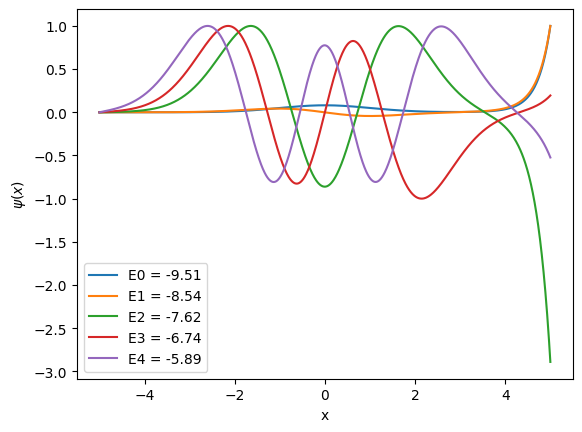

In [13]:
X = np.linspace(-5,5,1000)

Y1 = Numerov1(X, -9.51)
Y1 = Y1/max(Y1)
Y2 = Numerov1(X, -8.54)
Y2 = Y2/max(Y2)
Y3 = Numerov1(X, -7.62)
Y3 = Y3/max(Y3)
Y4 = Numerov1(X, -6.74)
Y4 = Y4/max(Y4)
Y5 = Numerov1(X, -5.89)
Y5 = Y5/max(Y5)

plt.plot(X,Y1, label = "E0 = -9.51")
plt.plot(X,Y2, label = "E1 = -8.54")
plt.plot(X,Y3, label = "E2 = -7.62")
plt.plot(X,Y4, label = "E3 = -6.74")
plt.plot(X,Y5, label = "E4 = -5.89")
plt.ylabel("$\psi(x)$")
plt.xlabel("x")
plt.legend()
plt.show()


### Parte j: Potencial Racional. Primeros dos estados ligados y los estados propios del operador.

#### Primero se consiguen los dos estados ligados.

In [19]:
def PotencialRacional(x):
    return -4/((1+x**2)**2)

def Numerov2(X, E):
    h = X[1]-X[0]
    Y = np.zeros(len(X))
    Y[0] = 0
    Y[1] = 1*10**(-5)	
    for i in range(2,len(X)):
        num1 = 2*(1+((5/12)*(h**2)*2*((PotencialRacional(X[i-1]))-(E))))*Y[i-1]
        num2 = (1-(1/12)*(h**2)*2*((PotencialRacional(X[i-2]))-(E)))*Y[i-2]
        denom = 1-(1/12)*(h**2)*2*((PotencialRacional(X[i]))-(E))
        Y[i] = (num1-num2)/denom
    #Normalizar
    #Y = Y/np.sqrt(np.sum(Y**2))
    return Y

def CondicionValoresPropios2(X, E):
    dE = 0.001
    Y = Numerov2(X, E)
    Ycomp = Numerov2(X, E+dE)
    if Y[-1]*Ycomp[-1] < 0:
        
        return E, Y[-1]
    else:
        return False
    
E_i = -1.5
E = []
Vs = []

while len(E) < 2:
    condicion =  CondicionValoresPropios2(X, E_i) 
    if condicion != False:
        print("hola")
        print(E_i)        
        E.append(E_i)
        Vs.append(condicion[1])
    E_i += 0.001
print(E)
print(Vs)